<a href="https://colab.research.google.com/github/suyasuyao/DiaLogBook/blob/master/%E9%95%B7%E6%9C%9F%E3%82%B3%E3%83%BC%E3%82%B9_%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E5%9F%BA%E7%A4%8E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師あり学習　回帰①

# 重回帰分析の実装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# データセットの読み込み xは入力、tは目標値として読み込み
from sklearn.datasets import load_boston
dataset = load_boston()
x,t = dataset.data, dataset.target
columns = dataset.feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
type(x), x.shape, type(t), t.shape

(numpy.ndarray, (506, 13), numpy.ndarray, (506,))

In [4]:
#xをdfというデータフレームに変換
df = pd.DataFrame(x,columns = columns)


In [5]:
# tをdfデータフレームに格納
df['Target'] = t 
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
# xを入力　tを目標として再度設定　再度numpyに戻す
t = df['Target'].values
x = df.drop(labels=['Target'],axis=1).values


# 学習用データセットとテスト用データセットへ分割

In [8]:
from sklearn.model_selection import train_test_split
# x_trainは学習用入力、x_testはテスト用学習、t_trainは学習用目標t_testはテスト用目標に分割　テストデータは30% ランダムのシード値は０（数字は固定であればいい）
x_train, x_test,t_train, t_test= train_test_split(x,t, test_size=0.3, random_state = 0)

# モデルの学習検証

In [9]:
# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [10]:
# モデルの学習　xとtの訓練で

model.fit(x_train, t_train)

LinearRegression()

In [11]:
# coefは重みパラメータw
# wは重回帰分析の式を表すためのパラメータ

model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [12]:
# 学習後のパラメータ w 
model.intercept_

37.93710774183309

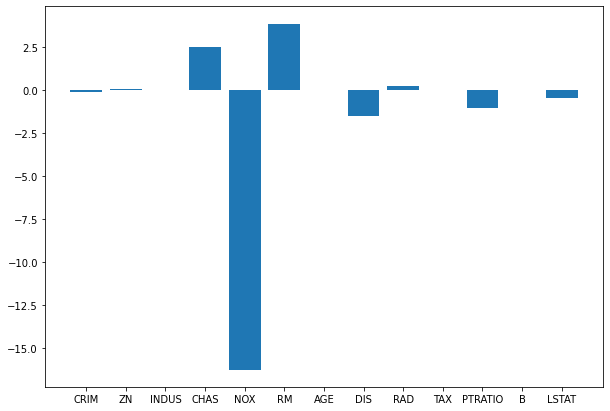

In [13]:
# パラメータの分布をヒストグラムで可視化
# matplotで横が10インチ、縦が７インチの大きさになる　画面の数値の尺度ではない
plt.figure(figsize=(10,7))
# 横はカラム名　縦はwの値
plt.bar(x=columns, height=model.coef_);

In [14]:
# scoreで決定係数を検証　学習用入力ｘから学習用目標tが導き出せるかの決定係数
print('train score : ', model.score(x_train, t_train))
# scoreで決定係数を検証　テスト用入力ｘからテスト用目標tが導き出せるかの決定係数
print('test score : ', model.score(x_test, t_test))

train score :  0.7645451026942549
test score :  0.6733825506400171


# 推論

In [15]:
# 推論
y = model.predict(x_test)

In [16]:
print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  24.935707898576915
目標値:  22.6
